# Protein dataset data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df_dup = pd.read_csv("protein\\pdb_data_no_dups.csv")
df_seq = pd.read_csv("protein\\pdb_data_seq.csv")

### let's understand dataframes

In [3]:
print("The dataframe 'df_dup' has {} rows and {} columns.".format(df_dup.iloc[:,0].shape, df_dup.iloc[0,:].shape))

The dataframe 'df_dup' has (141401,) rows and (14,) columns.


In [4]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [5]:
df_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [6]:
print("The dataframe 'df_seq' has {} rows and {} columns.".format(df_seq.iloc[:,0].shape, df_seq.iloc[0,:].shape))

The dataframe 'df_seq' has (467304,) rows and (5,) columns.


In [7]:
## sequence has some repeated entries so lets drop the duplicates
df_seq.drop_duplicates(subset='sequence', inplace=True)

In [8]:
print("After removing the duplicates, the dataframe has {} rows and {} columns.".format(df_seq.iloc[:,0].shape, df_seq.iloc[0,:].shape))

After removing the duplicates, the dataframe has (104813,) rows and (5,) columns.


In [9]:
df_seq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104813 entries, 0 to 467295
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        104813 non-null  object
 1   chainId            104812 non-null  object
 2   sequence           104812 non-null  object
 3   residueCount       104813 non-null  int64 
 4   macromoleculeType  101336 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.8+ MB


In [10]:
df_dup.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,141401.000000,128589.000000,1.414010e+05,97039.000000,124724.000000,124749.000000,105110.000000,117602.000000
mean,825.374849,2.263807,1.120790e+05,290.967713,2.670267,51.353163,6.788685,2008.922365
std,2136.461080,1.410878,5.690152e+05,9.541080,0.783740,10.104561,2.556819,8.459286
min,0.000000,0.480000,3.143800e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,226.000000,1.800000,2.612856e+04,290.000000,2.210000,44.370000,6.000000,2005.000000
50%,414.000000,2.100000,4.747779e+04,293.000000,2.490000,50.500000,7.000000,2010.000000
75%,820.000000,2.500000,9.408484e+04,295.000000,2.910000,57.710000,7.500000,2014.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,99.000000,92.000000,724.000000,2018.000000


In [11]:
df_seq.describe()

,residueCount
count,104813.000000
mean,1389.441128
std,3973.639625
min,0.000000
25%,239.000000
50%,476.000000
75%,1000.000000
max,157478.000000


### Let's understand data more

In [12]:
# Let's count the number of unique structure ids

print('Unique structureId: ', df_dup.structureId.nunique())
print('Unique structureId-seq: ', df_seq.structureId.nunique())
print('Unique sequence: ', df_seq.sequence.nunique())
print('Unique classes: ', df_dup.classification.nunique())
print('Unique residueCount: ', df_dup.residueCount.nunique())
# We find the number of repetition of sequence
print('10 most common structure Id frequency: \n', df_seq.structureId.value_counts()[:10])
# Let's check if the repeated entries with same structureId have the different sequences or not
dfst = df_seq.structureId.value_counts()

# Count the number of structure ids with more than one sequences:
count = 0
for i in range(len(dfst)):
    if dfst.values[i] > 1:
        count += 1
print('Number of structureId with multiple entries: ', count)
print('--'*20)
print('Are all structureId with multiple entries corresponds unique sequence?')

str_counts= 0
for i in range(100):
    if df_seq[df_seq['structureId'] == dfst.keys()[i]].sequence.nunique() > 1:
        str_counts += 1
if str_counts > 1:
    print('Not all of those multiple entries have unique sequences but several of those have')

Unique structureId:  140911
Unique structureId-seq:  83931
Unique sequence:  104812
Unique classes:  5050
Unique residueCount:  4744
10 most common structure Id frequency: 
 3JAG    82
5IT7    77
3JBN    77
5MRC    72
2YMI    54
2YMH    54
2YMR    53
5T2A    51
3J7Y    51
5MYJ    51
Name: structureId, dtype: int64
Number of structureId with multiple entries:  11857
----------------------------------------
Are all structureId with multiple entries corresponds unique sequence?
Not all of those multiple entries have unique sequences but several of those have


We see that there are several entries with same structure id and some them have same sequences while others have different.
Let's keep one sequence corresponding to the one structureId only, therefore, merge 
two dataframes by using 'inner' merge on 'structureId' and remove all  entries with duplicate sequences. 

In [13]:
## Let's merge two dataframes
df_merge = pd.merge(df_dup,df_seq[['structureId','chainId','sequence']], on='structureId', how='inner')
#df_merge.head()

In [14]:
df_merge.classification.nunique()

4433

In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105272 entries, 0 to 105271
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               105272 non-null  object 
 1   classification            105271 non-null  object 
 2   experimentalTechnique     105272 non-null  object 
 3   macromoleculeType         101784 non-null  object 
 4   residueCount              105272 non-null  int64  
 5   resolution                94721 non-null   float64
 6   structureMolecularWeight  105272 non-null  float64
 7   crystallizationMethod     67913 non-null   object 
 8   crystallizationTempK      68563 non-null   float64
 9   densityMatthews           86434 non-null   float64
 10  densityPercentSol         86523 non-null   float64
 11  pdbxDetails               83137 non-null   object 
 12  phValue                   73107 non-null   float64
 13  publicationYear           87446 non-null   f

In [16]:
len(df_dup.structureId), len(df_seq.structureId), len(df_merge.structureId)

(141401, 104813, 105272)

In [17]:
df_merge.sequence.nunique()

104812

In [18]:
dfcls = df_merge.groupby('macromoleculeType').count().sort_values('sequence', \
                                                                  ascending=False)['sequence'][:6]

In [19]:
dfcls

macromoleculeType
Protein            88169
Protein#DNA         6019
Protein#RNA         4913
DNA                  974
RNA                  908
Protein#DNA#RNA      542
Name: sequence, dtype: int64

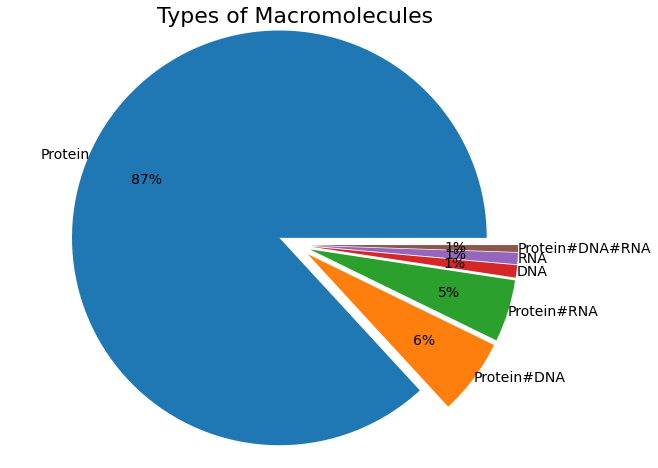

In [20]:
# Plot the types of macromolecules in the form of Pie chart. 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
explode=(0.1,0.09,0.09,0.09,0.09,0.09)
ax.pie(dfcls.values,
       explode=explode,
       autopct='%1.0f%%',
       labels=dfcls.index,
       radius=1.2,
       pctdistance=0.7,
       labeldistance=1.0,
       textprops={'fontsize': 14})
_= plt.title('Types of Macromolecules', y =1, fontsize=22)
#plt.savefig('PieChart.png')

In [21]:
#Select only protein samples, not others and others with proteins
df_prot = df_merge[df_merge['macromoleculeType']=='Protein']
print(df_prot.shape)
len(df_prot[df_prot['macromoleculeType'] == "Protein"]['classification'].value_counts())

(88169, 16)


3956

In [22]:
# Delete the samples with missing class and sequence (keep string only)
df_cls = df_prot[[type(k)== str for k in df_prot.classification.values]]
df_cs = df_cls[[type(k) == str for k in df_cls.sequence.values]]
df_cs.shape, df_cls.shape, df_prot.shape

((88169, 16), (88169, 16), (88169, 16))

In [23]:
for i, v in df_cs.isnull().sum().items():
    print(i, " : ", round((v/len(df_cs))*100, 1))

structureId  :  0.0
classification  :  0.0
experimentalTechnique  :  0.0
macromoleculeType  :  0.0
residueCount  :  0.0
resolution  :  10.2
structureMolecularWeight  :  0.0
crystallizationMethod  :  33.2
crystallizationTempK  :  32.2
densityMatthews  :  13.9
densityPercentSol  :  13.8
pdbxDetails  :  17.7
phValue  :  27.6
publicationYear  :  18.6
chainId  :  0.0
sequence  :  0.0


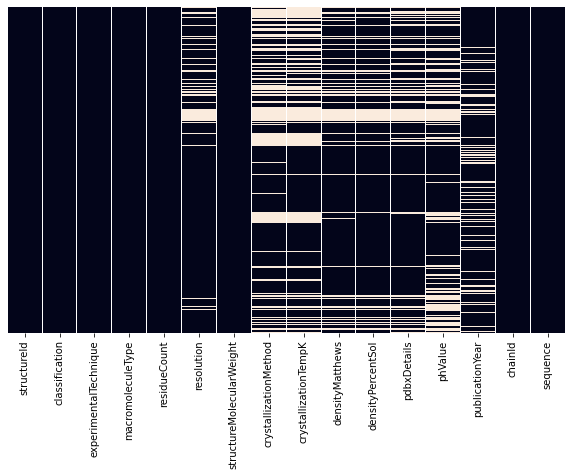

In [24]:
# Data columns with missing values:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cs.isnull(), cbar=False, yticklabels=False)
plt.show()

In [25]:
dff = df_cs.reset_index(drop=True)
dff.classification.nunique()

3956

In [26]:
## In "classification", we need to check some strings and make them consistent. For eg: replace comma by /, remove space etc.
dff['classification'] = dff.classification.astype('str')
dff['classification'] = dff.classification.str.lower()
dff['classification'] = dff.classification.str.replace(',', '/', regex = True)
dff['classification'] = dff.classification.str.replace(', ', '/', regex = True)

dff['classification'] = dff.classification.str.replace('/ ', '/', regex = True)
dff['classification'] = dff.classification.str.replace(' /', '/', regex = True)
dff['classification'] = dff.classification.str.replace(' ,', '/', regex = True)
dff['classification'] = dff.classification.str.replace('(', '/', regex = True)
dff['classification'] = dff.classification.str.replace(')', '', regex = True)
# Maintaing class ordering. There are the same classes with different order 
#ex. "viral protein/immune system" and "immune system/viral protein". These should be the same class. Lets make it same
dff['classification'] = dff.classification.apply(lambda x:'/'.join(sorted(x.split('/'))))

In [27]:
dff.classification.nunique()

2684

In [28]:
dff[['classification', 'sequence']].nunique()

classification     2684
sequence          87761
dtype: int64

<AxesSubplot:xlabel='structureMolecularWeight', ylabel='densityMatthews'>

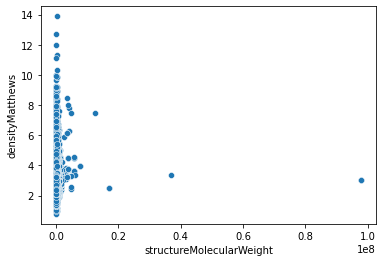

In [29]:
sns.scatterplot(x="structureMolecularWeight", y="densityMatthews", data=dff)

# Later check: You can compare weight with sequence length

In [30]:
dff.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,88169.00000,79189.000000,8.816900e+04,59748.000000,75928.000000,75969.000000,63794.000000,71779.000000
mean,922.22940,2.351029,1.224987e+05,291.117328,2.711001,51.908211,6.799298,2009.016955
std,3166.59574,1.510565,7.826646e+05,7.922397,0.738879,10.307668,1.333492,9.300810
min,3.00000,0.620000,4.535500e+02,4.000000,0.790000,0.280000,0.000000,201.000000
25%,235.00000,1.800000,2.651029e+04,290.000000,2.230000,44.850000,6.000000,2005.000000
50%,451.00000,2.120000,5.079296e+04,293.000000,2.520000,51.100000,7.000000,2010.000000
75%,880.00000,2.600000,9.921880e+04,295.000000,2.960000,58.380000,7.500000,2014.000000
max,157478.00000,70.000000,9.773054e+07,398.000000,13.890000,90.330000,100.000000,2018.000000


We see, several of the phValues are 100, so let's replace this by NaN

C:\Users\abiad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


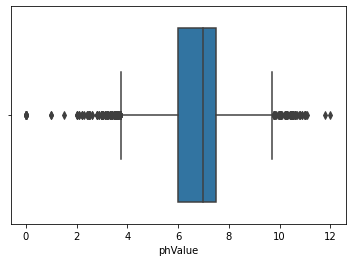

In [31]:
dff['phValue'] = dff['phValue'].replace(100, np.nan)
_= sns.boxplot(dff['phValue'].dropna())

In [32]:
dff.phValue.isnull().value_counts()

False    63793
True     24376
Name: phValue, dtype: int64

In [33]:
counts1 = dff['classification'].value_counts()
types = np.asarray(counts1[(counts1 > 100)].index)
data1 = dff[dff.classification.isin(types)].copy()
data1.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,101M,oxygen transport,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,102L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,102M,oxygen transport,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [34]:
class_dict = dict()
count = 0

classes = data1['classification'].value_counts().items()

for cat, num in classes:
    
    # Remove all other classes that have number of values are less than 100
    if num < 100:
        temp = data1['classification'] == cat
        data1 = data1[~temp].copy()
        continue
        
    # Remove all a class if all phValues are null
    if data1[(data1['classification'] == cat) & (data1['phValue'].notnull())].phValue.count() == 0:
        temp = data1['classification'] == cat
        data1 = data1[~temp].copy()
        continue
    
    ph_mean = round(data1[data1['classification'] == cat]['phValue'].dropna().mean(),2)
    data1.loc[(data1['classification'] == cat) & (data1['phValue'].isna()),'phValue'] = ph_mean
    
    
    
    if num >= 100:
        class_dict[cat] = count
        count += 1

#class_dict

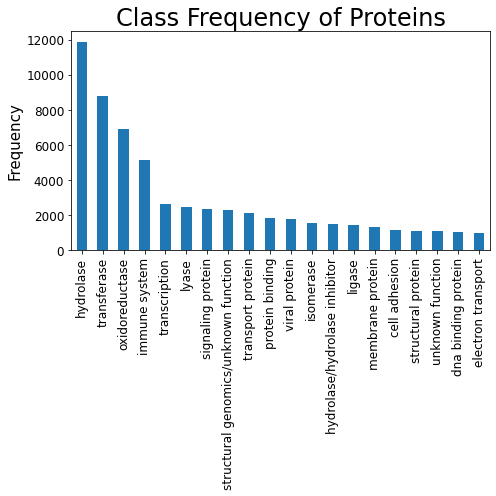

In [35]:
# Print the frequency the top 20 most common classes:

df_class = data1['classification'].value_counts()[:20]
plt.figure(figsize=(7, 7))
df_class.plot(kind='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Class Frequency of Proteins', fontsize=24)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('ClassFreqProteins.pdf')

In [36]:
data1.keys()

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear', 'chainId', 'sequence'],
      dtype='object')

In [37]:
# Assign the target variable as 'label' for the numerical classes:
data1['label'] = data1['classification'].map(class_dict)
len(data1.sequence), len(data1.label)

(75202, 75202)

In [38]:
data1["classification"][0:10]

0                      oxygen transport
2                      oxygen transport
5                      oxygen transport
6                      oxygen transport
10                     oxygen transport
11    transferase/transferase inhibitor
18                            hydrolase
21                               ligase
22                            hydrolase
23                          transferase
Name: classification, dtype: object

In [39]:
data1.label[0:10]

0     48
2     48
5     48
6     48
10    48
11    25
18     0
21    13
22     0
23     1
Name: label, dtype: int64

In [40]:
df = data1
import re
length = []
for x in df.sequence.values:
    x = re.sub(r"\s+", "", x) # remove all the spaces in x if any.
    length.append(len(x))
lengths = pd.DataFrame(length, columns=['lengths']).reset_index()

In [41]:
df = df.reset_index(drop=True).reset_index();

In [42]:
df = df.merge(lengths, on='index', how='inner')

In [43]:
df.drop('index', axis=1, inplace=True)

In [44]:
df_dl = df[['structureId', 'classification', 'sequence', 'lengths', 'label']]

In [45]:
df_dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75202 entries, 0 to 75201
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   structureId     75202 non-null  object
 1   classification  75202 non-null  object
 2   sequence        75202 non-null  object
 3   lengths         75202 non-null  int64 
 4   label           75202 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


In [46]:
# Data for deep learning models.
# This contains only sequences and classifications.

df_dl.to_csv(r'protein_seq-cls.csv')

In [47]:
df.drop(['publicationYear', 'pdbxDetails',
         'crystallizationTempK', 'macromoleculeType',
         'crystallizationMethod'], axis=1, inplace=True)

In [48]:
df.shape

(75202, 13)

In [49]:
df = df.groupby('chainId').ffill()

In [50]:
df.dropna(subset=['densityMatthews',
                  'densityPercentSol',
                  'resolution', 'sequence',
                  'phValue'], inplace=True)

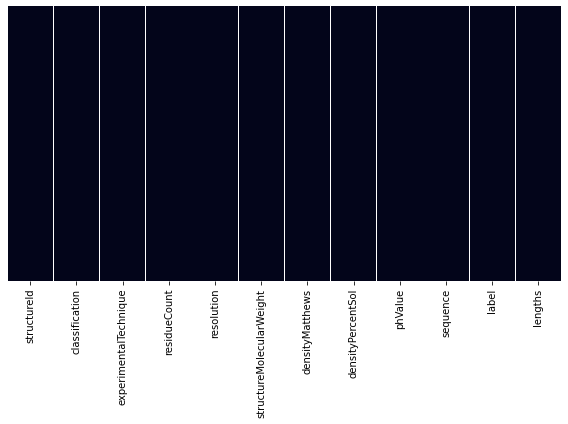

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.tight_layout()
#plt.savefig('HeatmapForMissingdata.pdf')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75010 entries, 0 to 75201
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               75010 non-null  object 
 1   classification            75010 non-null  object 
 2   experimentalTechnique     75010 non-null  object 
 3   residueCount              75010 non-null  int64  
 4   resolution                75010 non-null  float64
 5   structureMolecularWeight  75010 non-null  float64
 6   densityMatthews           75010 non-null  float64
 7   densityPercentSol         75010 non-null  float64
 8   phValue                   75010 non-null  float64
 9   sequence                  75010 non-null  object 
 10  label                     75010 non-null  int64  
 11  lengths                   75010 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 7.4+ MB


In [53]:
df.head()

,structureId,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,sequence,label,lengths
0,101M,oxygen transport,X-RAY DIFFRACTION,154,2.07,18112.80,3.09,60.2,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
1,102M,oxygen transport,X-RAY DIFFRACTION,154,1.84,18010.64,3.09,60.2,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
2,104M,oxygen transport,X-RAY DIFFRACTION,153,1.71,18030.63,1.87,34.3,7.0,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,48,153
3,106M,oxygen transport,X-RAY DIFFRACTION,154,1.99,18181.84,3.05,59.7,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
4,109M,oxygen transport,X-RAY DIFFRACTION,154,1.83,18133.80,3.07,59.9,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154


In [54]:
df.to_csv(r'protein_cls.csv') # Data saved for the Machine learning algorithms

## EDA

In [55]:
# Loading tidy datasets with features and target for machine learning models.
data = pd.read_csv('protein_cls.csv', index_col=0)
data.head()

,structureId,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,sequence,label,lengths
0,101M,oxygen transport,X-RAY DIFFRACTION,154,2.07,18112.80,3.09,60.2,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
1,102M,oxygen transport,X-RAY DIFFRACTION,154,1.84,18010.64,3.09,60.2,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
2,104M,oxygen transport,X-RAY DIFFRACTION,153,1.71,18030.63,1.87,34.3,7.0,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,48,153
3,106M,oxygen transport,X-RAY DIFFRACTION,154,1.99,18181.84,3.05,59.7,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
4,109M,oxygen transport,X-RAY DIFFRACTION,154,1.83,18133.80,3.07,59.9,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75010 entries, 0 to 75201
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               75010 non-null  object 
 1   classification            75010 non-null  object 
 2   experimentalTechnique     75010 non-null  object 
 3   residueCount              75010 non-null  int64  
 4   resolution                75010 non-null  float64
 5   structureMolecularWeight  75010 non-null  float64
 6   densityMatthews           75010 non-null  float64
 7   densityPercentSol         75010 non-null  float64
 8   phValue                   75010 non-null  float64
 9   sequence                  75010 non-null  object 
 10  label                     75010 non-null  int64  
 11  lengths                   75010 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 7.4+ MB


In [57]:
data.shape

(75010, 12)

In [58]:
data = data.dropna().reset_index().drop(columns='index', axis=1)
data.shape

(75010, 12)

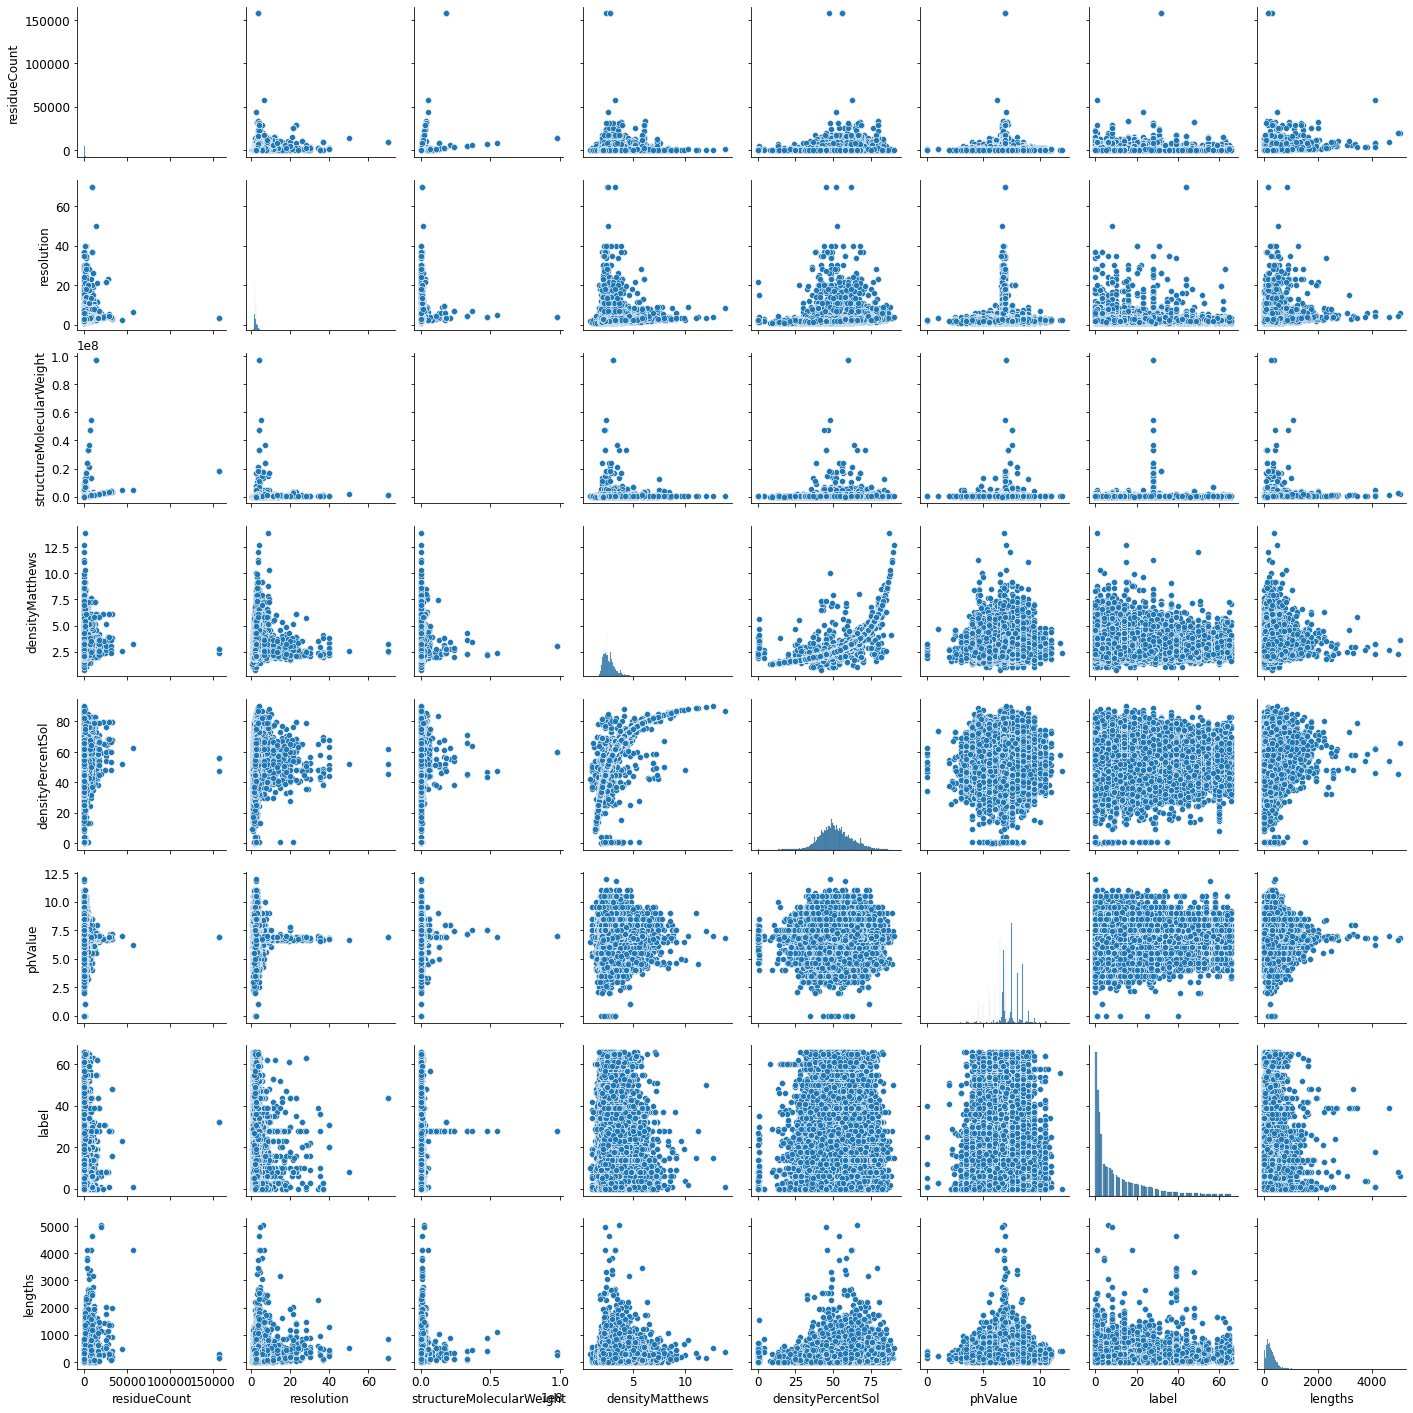

In [59]:
# Plotting the pair distrihution among the features. 
plt.rcParams['font.size'] = 12
sns.pairplot(data)
plt.show()

In [60]:
# Distribution of sequences as Ph-values
def set_phlevel(x):
    if x > 7:
        return 'Basic'
    elif x < 7:
        return 'Acidic'
    else:
        return 'Neutral'

data['ph_level'] = data['phValue'].apply(set_phlevel)
ph_level = data.groupby('ph_level')['ph_level'].count()

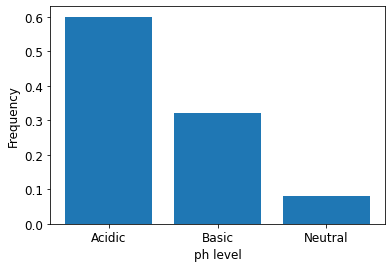

In [61]:
sizes = np.round((ph_level.values) / sum(ph_level.values), 2).tolist()
labels = ph_level.index.tolist()
plt.bar(x=labels, height=sizes)
plt.xlabel('ph level')
plt.ylabel('Frequency')
plt.show()

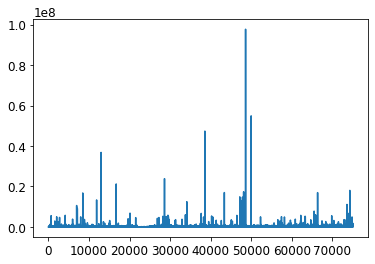

In [62]:
# Plotting counts of protein sequences as a function of
# Molecular weights.
data.structureMolecularWeight.plot()
plt.show()

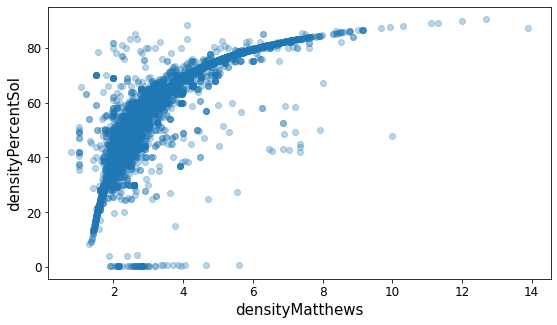

In [63]:
# Relation between the densityMatthews and densityPercentSol
plt.figure(figsize=(9,5))
plt.scatter(x='densityMatthews', y='densityPercentSol', data=data, alpha=0.3)
plt.xlabel('densityMatthews', fontsize=15)
plt.ylabel('densityPercentSol', fontsize=15)
plt.show()

<AxesSubplot:>

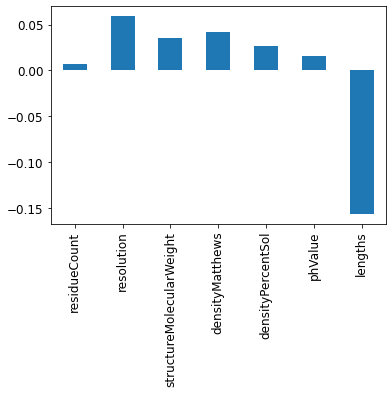

In [64]:
# Correlation of features to target. 
corr_with_class = data.corr()['label']
corr_with_class.drop('label').plot(kind='bar')

Let's move to build machine and deep learnig algorithm.